Creating an ANN using Pytorch

In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [3]:
import seaborn as sns

In [4]:
import numpy as np
df['Outcome'] = np.where(df['Outcome']==1,"Diabetic","No Diabetic")

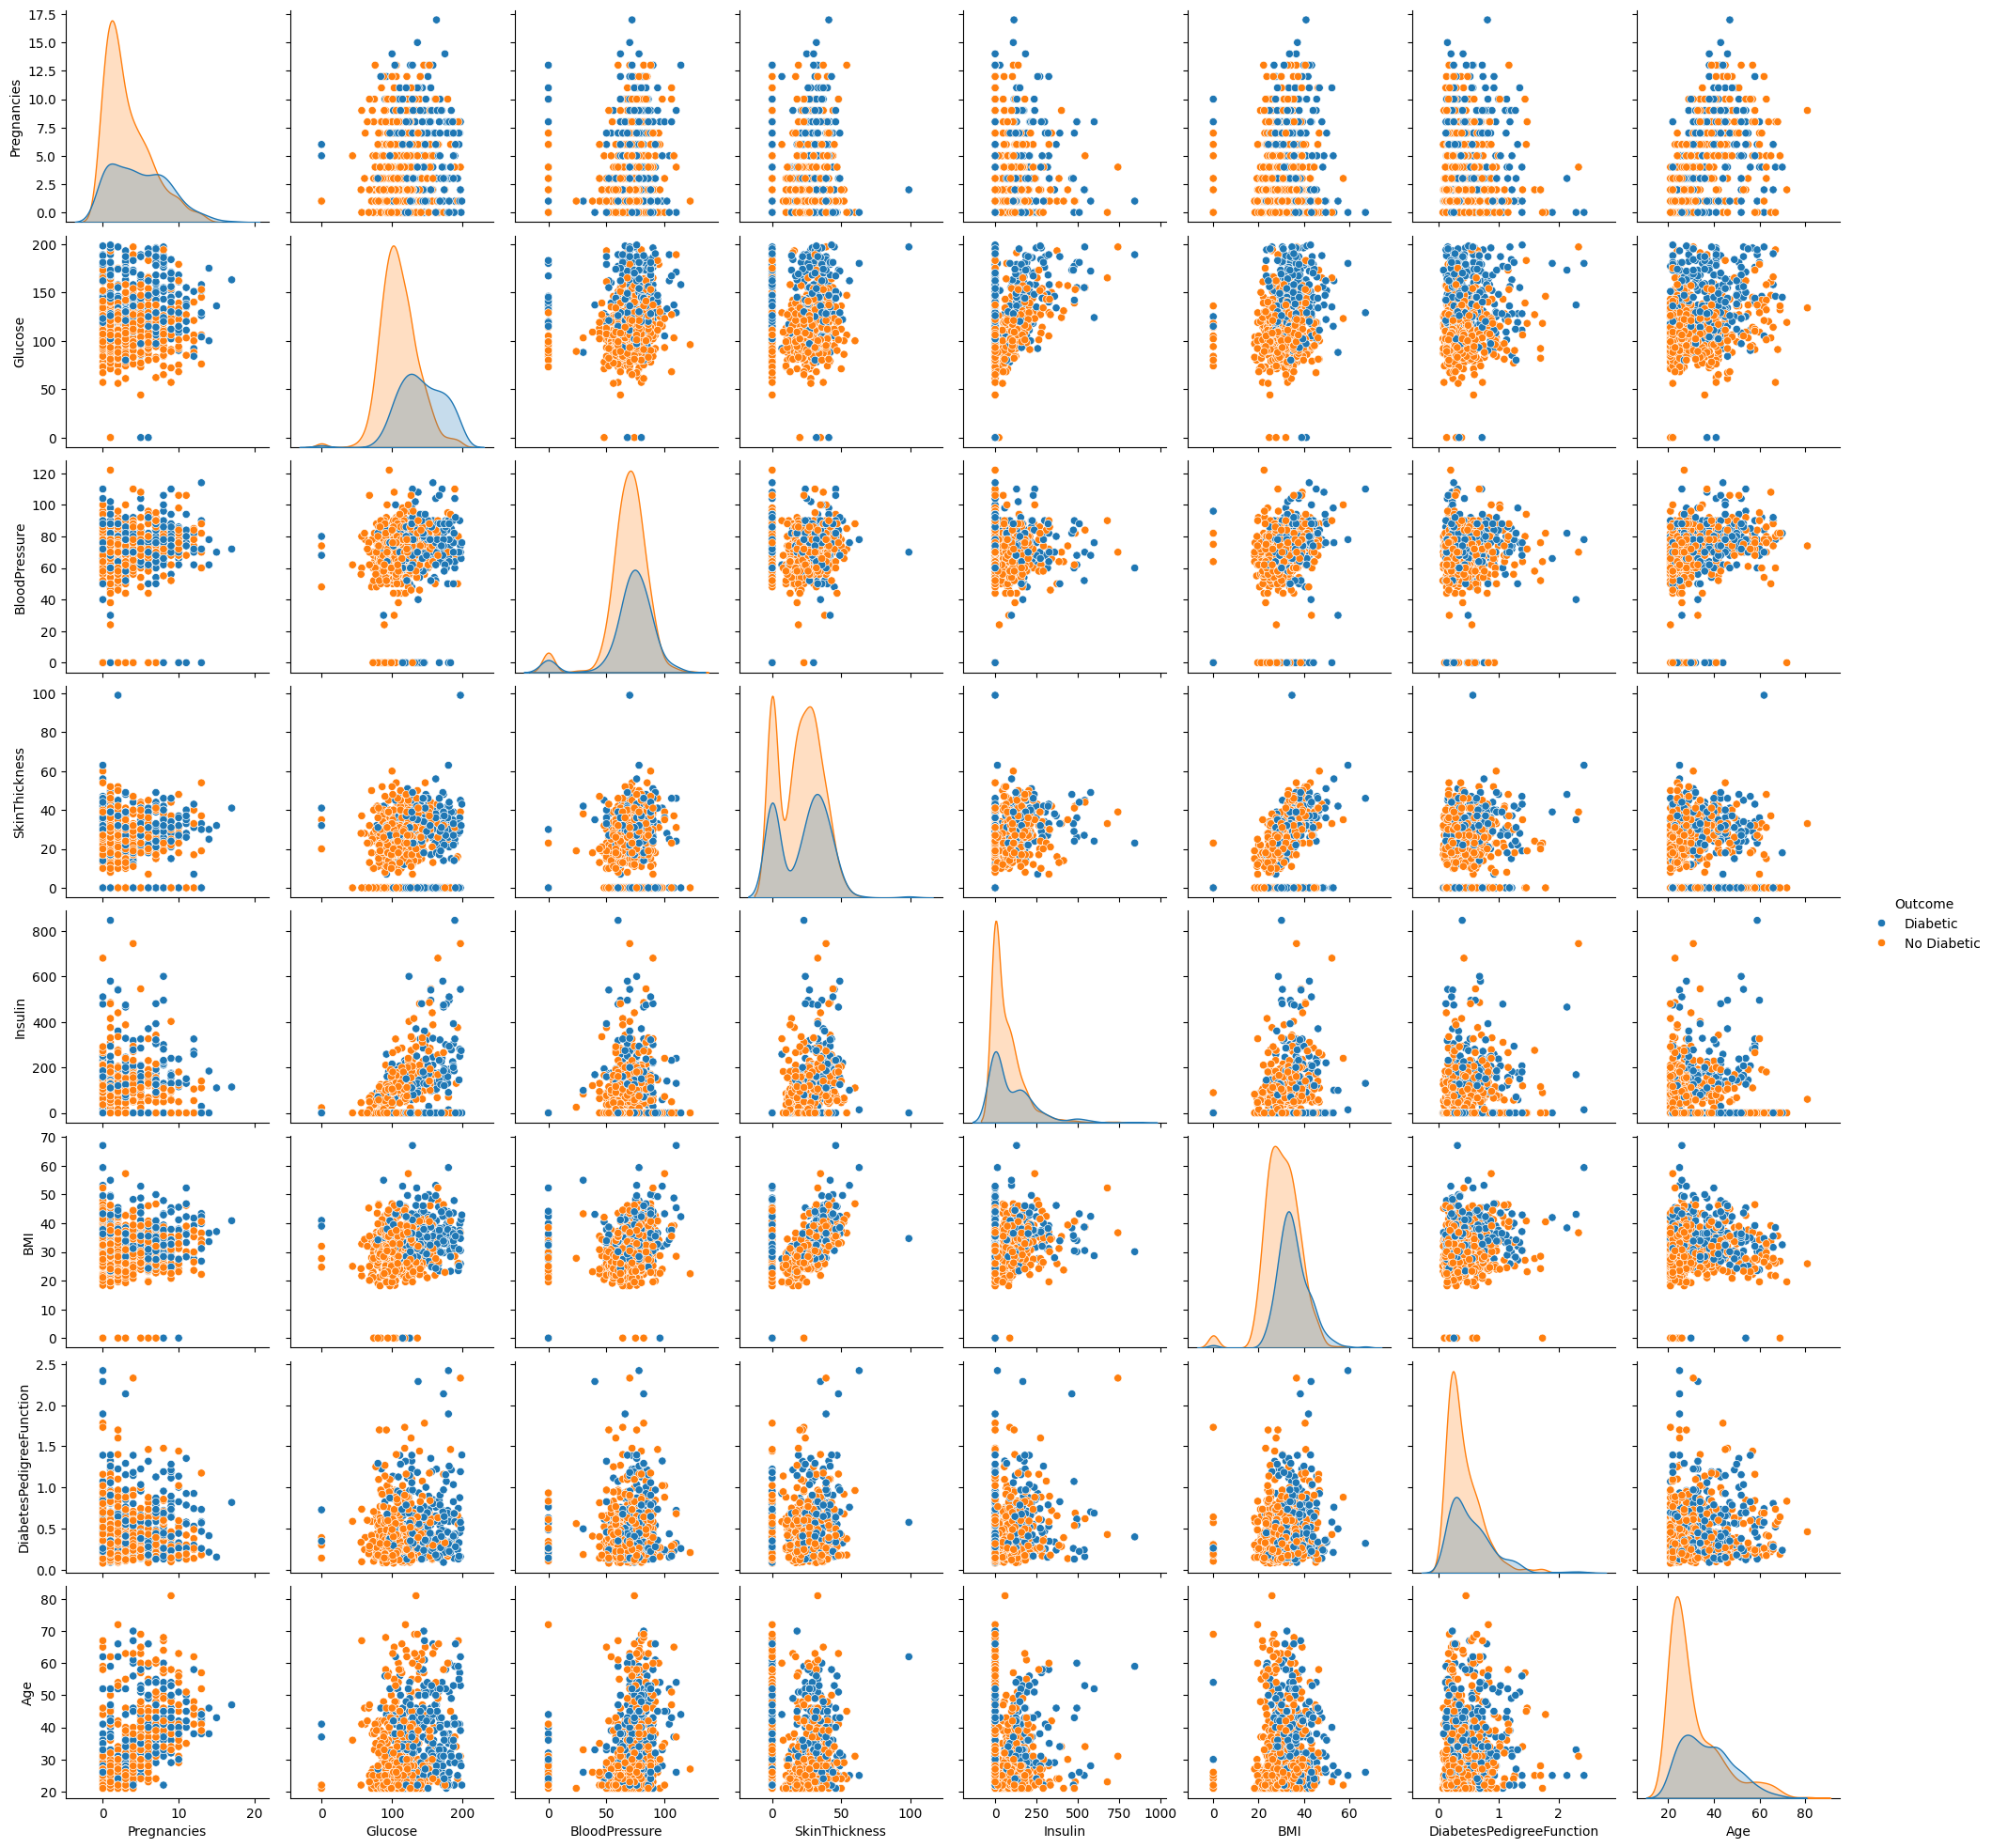

In [5]:
sns.pairplot(df, hue="Outcome")

In [6]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
from sklearn.model_selection import train_test_split
X=df.drop('Outcome',axis=1).values
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
#Libraries from PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [35]:
##### Create tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [36]:
#CREATING PYTORCH MODEL

class ANN_Model(nn.Module):
  def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
    super().__init__()
    self.f_connected1 = nn.Linear(input_features,hidden1)
    self.f_connected2 = nn.Linear(hidden1, hidden2)
    self.out = nn.Linear(hidden2,out_features)

  def forward(self,x):
    x = F.relu(self.f_connected1(x))
    x = F.relu(self.f_connected2(x))
    x = self.out(x)
    return x

In [37]:
#instantiate my ANN_model
torch.manual_seed(20)
model = ANN_Model()

In [38]:
#backward propagation
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [39]:
epochs = 500
final_losses = []
for i in range(epochs):
  i = i+1
  y_pred = model.forward(X_train)
  loss = loss_function(y_pred,y_train)
  final_losses.append(loss)
  if(i%10==1):
    print("Epoch number: {} and the loss: {}".format(i,loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch number: 1 and the loss: 3.4572105407714844
Epoch number: 11 and the loss: 0.8019207715988159
Epoch number: 21 and the loss: 0.609032154083252
Epoch number: 31 and the loss: 0.5917770862579346
Epoch number: 41 and the loss: 0.5679708123207092
Epoch number: 51 and the loss: 0.5529041886329651
Epoch number: 61 and the loss: 0.5410094857215881
Epoch number: 71 and the loss: 0.5310390591621399
Epoch number: 81 and the loss: 0.5220361351966858
Epoch number: 91 and the loss: 0.5135971903800964
Epoch number: 101 and the loss: 0.5061254501342773
Epoch number: 111 and the loss: 0.49834102392196655
Epoch number: 121 and the loss: 0.49605506658554077
Epoch number: 131 and the loss: 0.4828636944293976
Epoch number: 141 and the loss: 0.4756036400794983
Epoch number: 151 and the loss: 0.47992339730262756
Epoch number: 161 and the loss: 0.4792986512184143
Epoch number: 171 and the loss: 0.4650002121925354
Epoch number: 181 and the loss: 0.45820489525794983
Epoch number: 191 and the loss: 0.45270

In [40]:
#Plot loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

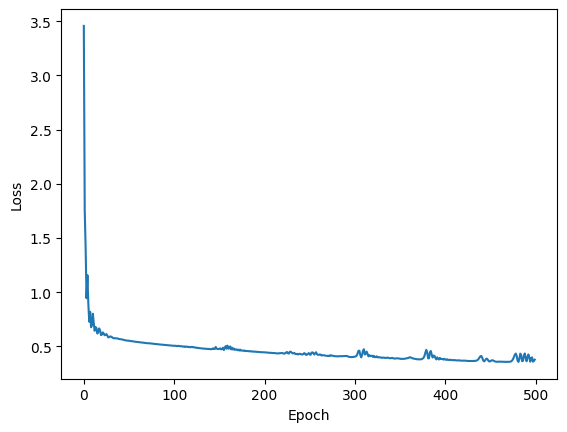

In [41]:
plt.plot(range(epochs), [loss.detach().numpy() for loss in final_losses])
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [42]:
#Prediction in X_test data
predictions = []
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_pred = model(data)
    predictions.append(y_pred.argmax().item())

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[89, 18],
       [13, 34]])

Text(95.72222222222221, 0.5, 'Predicted Values')

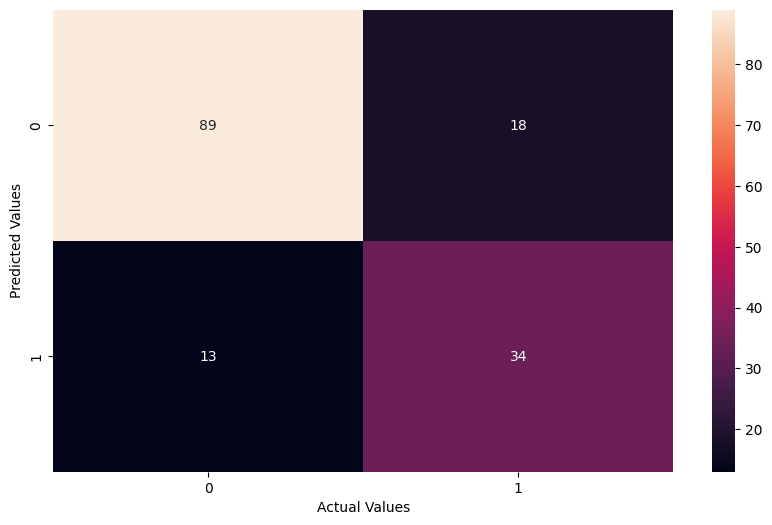

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [45]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,predictions)
score

0.7987012987012987

In [46]:
#Save the model
torch.save(model, 'diabetes.pt')

In [ ]:
model = torch.load('diabetes.pt', weights_only=False)

In [ ]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [ ]:
#Prediction of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

## Pickling the model for deployment

In [47]:
import pickle

In [49]:
pickle.dump(model, open('model.pkl','wb'))

In [50]:
pickled_model = pickle.load(open('model.pkl','rb'))